# HOW TO RUN THIS NOTEBOOK 

Running this whole notebook from start to end should take 20minutes on a normal mac. The "# FIND MOST POPULAR TOPICS / NOUNS" section towards the end will likely crash after processing about 5,000 rows and extracting nouns. That is fine. Just run the final cell "# FIND MOST POPULAR TOPICS / NOUNS" to get the list of topics. 

Load imports

In [1]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import string
import glob
import heapq
import re

/Users/galmoore/anaconda/envs/twitterNLP2/lib/python2.7/site-packages/matplotlib/__init__.py:1066: UserWarning: Duplicate key in file "/Users/galmoore/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


load all files into dataframe

In [2]:
# 118 seconds to concat all 15m rows into one df
import time
csv_files = glob.glob('data/*.csv')
#  key for ordering list of csv files
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

csv_files = sorted(csv_files, key=natural_key)
list_data = []
list_tweets_per_day = []
list_corresponding_dates_of_tweets = []

#  concat all csv files
for filename in csv_files:   
    # COUNT NUMBER OF TWEETS PER DAY 
    num_lines = sum(1 for l in open(filename))
    dataToCheckNumTweets = pd.read_csv(filename)
    list_tweets_per_day.append(dataToCheckNumTweets['tweet_id'].count())
    # GRAB ONLY DATE OF CSV FILE
    list_corresponding_dates_of_tweets.append(filename[-14:-4])
    data = pd.read_csv(filename)
    list_data.append(data)

df = pd.concat(list_data,ignore_index=True)

# NUMBER OF TWEETS PER DAY

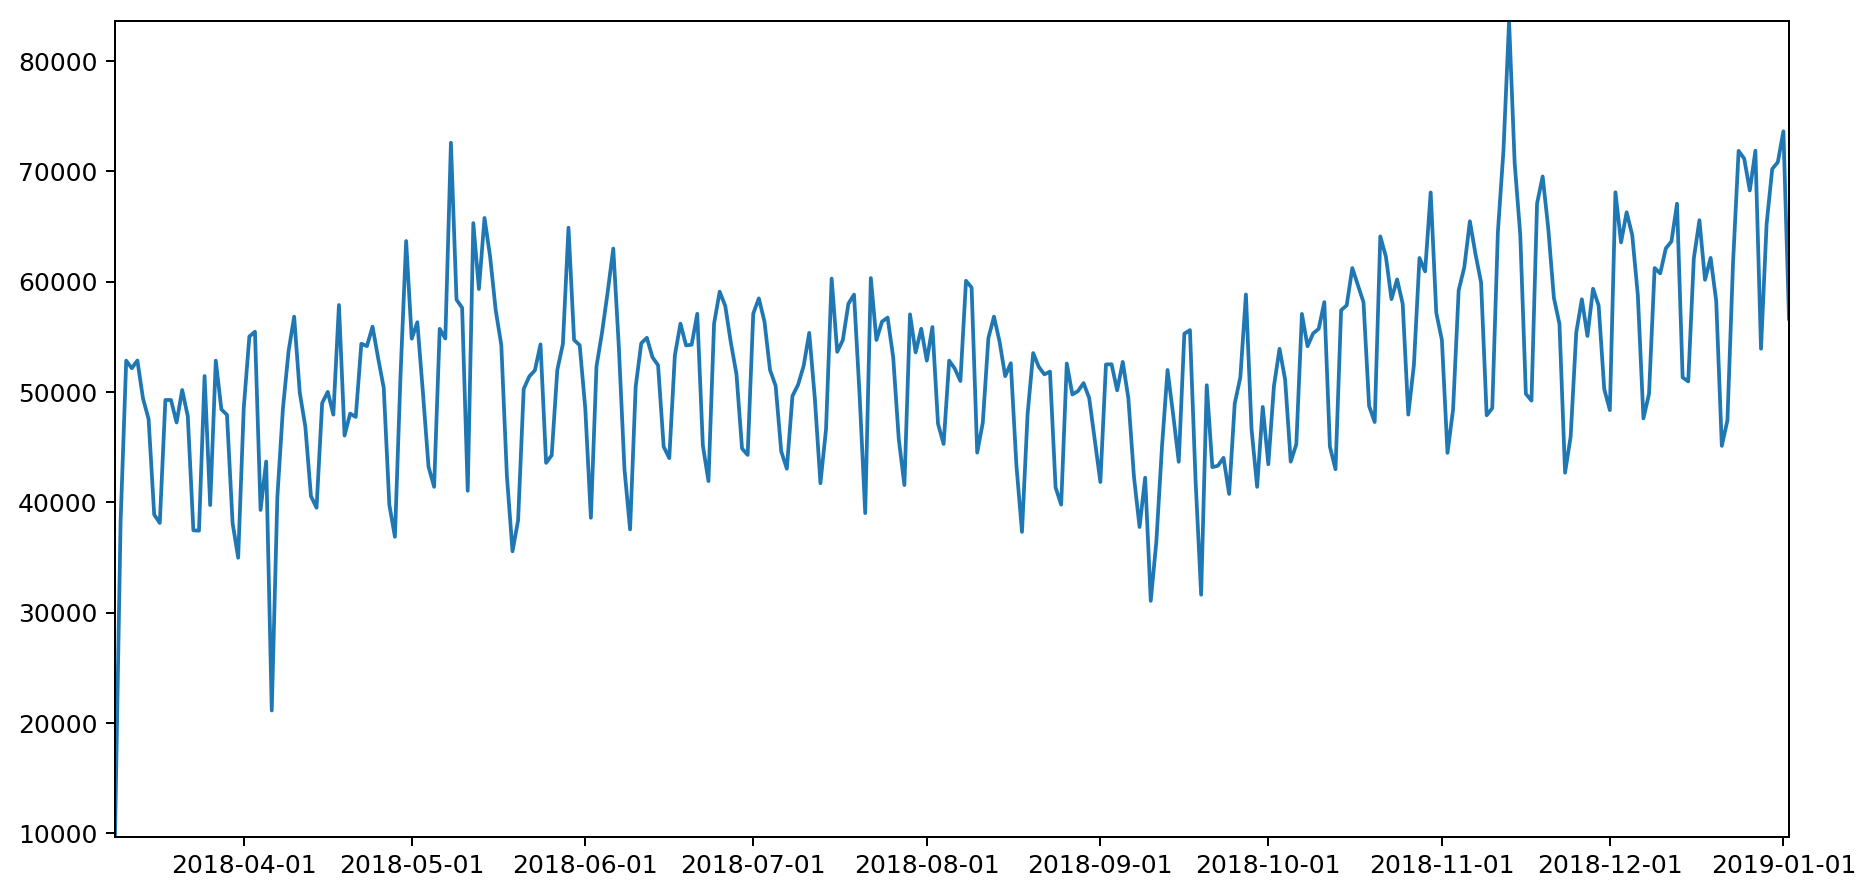

In [3]:
x = list_tweets_per_day
y = list_corresponding_dates_of_tweets
plt.figure(figsize=(12, 6), dpi= 90, facecolor='w', edgecolor='k')
s = pd.Series(x, index = list_corresponding_dates_of_tweets)
ticks = 23,53,84,114,145,176,206,237,267,298
labels = (1,2,3,4)
plt.xticks(ticks, labels,rotation=90)
plt.margins(0)
s.plot.line()

# 10 MOST ACTIVE DAYS ON TWITTER

In [4]:
topTen = heapq.nlargest(10, xrange(len(x)), key=x.__getitem__)
for i in range(len(topTen)):
    print("date of " + str(i+1) + "/10 most active day: " + y[topTen[i]] + " with " + str(x[topTen[i]]) + " tweets")

date of 1/10 most active day: 2018-11-13 with 83609 tweets
date of 2/10 most active day: 2019-01-01 with 73620 tweets
date of 3/10 most active day: 2018-05-08 with 72581 tweets
date of 4/10 most active day: 2018-11-12 with 71886 tweets
date of 5/10 most active day: 2018-12-27 with 71862 tweets
date of 6/10 most active day: 2018-12-24 with 71848 tweets
date of 7/10 most active day: 2018-12-25 with 71141 tweets
date of 8/10 most active day: 2018-12-31 with 70820 tweets
date of 9/10 most active day: 2018-11-14 with 70735 tweets
date of 10/10 most active day: 2018-12-30 with 70202 tweets


# CORRELATION WITH BIG NEWS STORIES?

From a simple Google search we uncover some pretty big news stories that support the notion that the volume of tweets is indeed driven by activity of users rather than some random occurence. At the top of the list is the 13th of November marking the height of the conflict between Israel and Hamas in Gaza

In [5]:
print("1st most active day " + y[topTen[0]] + " '370 rockets launched from Gaza'") 
print("2nd most active day " + y[topTen[1]] + " 'Livni dumped on live TV'") 
print("3rd most active day " + y[topTen[2]] + " 'Iranian soldiers killed in Israeli airstrike in Syria'") 
print("4th most active day " + y[topTen[3]] + " 'Hamas and its allies fired more than 300 rockets and mortars'") 
print("5th most active day " + y[topTen[4]] + " ???") 
print("6th most active day " + y[topTen[5]] + " 'Israeli government calls early elections in April'") 
print("7th most active day " + y[topTen[6]] + " 'Israeli Attack Near Syrian Capital Wounds 3 Soldiers'") 
print("8th most active day " + y[topTen[7]] + " ??") 
print("9th most active day " + y[topTen[8]] + " 'Avigdor Liberman resigns'") 
print("10th most active day " + y[topTen[9]] + " 'Naftali Bennett and Ayelet Shaked form new party'") 

1st most active day 2018-11-13 '370 rockets launched from Gaza'
2nd most active day 2019-01-01 'Livni dumped on live TV'
3rd most active day 2018-05-08 'Iranian soldiers killed in Israeli airstrike in Syria'
4th most active day 2018-11-12 'Hamas and its allies fired more than 300 rockets and mortars'
5th most active day 2018-12-27 ???
6th most active day 2018-12-24 'Israeli government calls early elections in April'
7th most active day 2018-12-25 'Israeli Attack Near Syrian Capital Wounds 3 Soldiers'
8th most active day 2018-12-31 ??
9th most active day 2018-11-14 'Avigdor Liberman resigns'
10th most active day 2018-12-30 'Naftali Bennett and Ayelet Shaked form new party'


# WHERE IS NETTA?!

Netta won the Eurovision on May 12 2018, but that date is not in our top 10 list! The Eurovision Song Contest began at 22:00 on
Tuesday, 8 May and ended on Saturday, 12 May (All times are in Israel Time)

In [6]:
euroVisionWeekList = []
for i in range(7):
    print("on the " + str(8+i) + " of May 2018 there were : " + str(x[60+i]) + " tweets")
    euroVisionWeekList.append(x[60+i])
# compare average Eurovision day with average over whole period:
print("")
print("Avg tweets per day over period: " + str(sum(x)/len(x)))
print ("Eurovision avg tweets per day: " + str(sum(euroVisionWeekList)/len(euroVisionWeekList)))

on the 8 of May 2018 there were : 72581 tweets
on the 9 of May 2018 there were : 58356 tweets
on the 10 of May 2018 there were : 57627 tweets
on the 11 of May 2018 there were : 41036 tweets
on the 12 of May 2018 there were : 65296 tweets
on the 13 of May 2018 there were : 59323 tweets
on the 14 of May 2018 there were : 65766 tweets

Avg tweets per day over period: 52179
Eurovision avg tweets per day: 59997


So if we want to assume that the volume of data per day does reflect some trend (volume of data could be random?!), it looks like the week of Netta's win was at least 10% more active than an average week. 14th of May also saw the openning of the USA embassy in Jerusalem. Should we have expected more activity on twitter? Are the number of tweets random? Maybe Israeli's use twitter for less serious matters?

![Image of Netta](https://media.fromthegrapevine.com/assets/images/2018/7/netta-with-trophy.jpg.824x0_q71_crop-scale.jpg)

# IDEAS FOR FURTHER INVESTIGATION

Here is a list of possible ideas to further explore the data 
- frequency of tweeting by users (most prolific tweeter)
- most popular time of day to tweet (histogram)
- Popular day of the week to tweet
- Sentiment analysis on specific topics
- correlate sentiment / time of day (when are people happiest?)
- top topics
- correlate popular tweets with news stories (pick top 3 that happened in period)
- What could have been predicted about news stories (we saw more mention of X over Y or sentiment A over B which led to outcome Z)
- Most retweeted tweet
- Correlation between popular tweets / sentiment
- Who was the most mentioned person
- URL most shared

# DEEP DIVE INTO THE DATA

In our top 10 list of most active days we found some pretty obvious causes for spikes in twitter traffic. But two dates from our top ten list remain unexplained. Let's check one day at random and see if we can uncover some interesting stories by looking at the data.

# WHAT HAPPENED ON THE 27TH OF DECEMBER?

We now start to explore the data to get clues about this specific date in history. For some reason it was the 5th most active day on twitter out of a 300 day period. Let's see what we can find out.

In [7]:
data27 =pd.read_csv("/Users/galmoore/anaconda/envs/twitterNLP2/data/twitter_dump_2018-12-27.csv", delimiter = ',')

# MOST PROLIFIC TWEETER

A random wander reveals a huge volume of topics and discussions. The most prolific posters on this day (posting 200, 300 and 400 tweets per day!) seem to be a rather loose collection of people and orginisations. It is fair to conclude that the volume of tweeting is not a measure of importance or popularity. A better metric would be followers or retweets - data that is not currently available to us. In conclusion, there is no evidence here to point that something interesting or important happen on this day.

top tweeters on: '27/12/18'


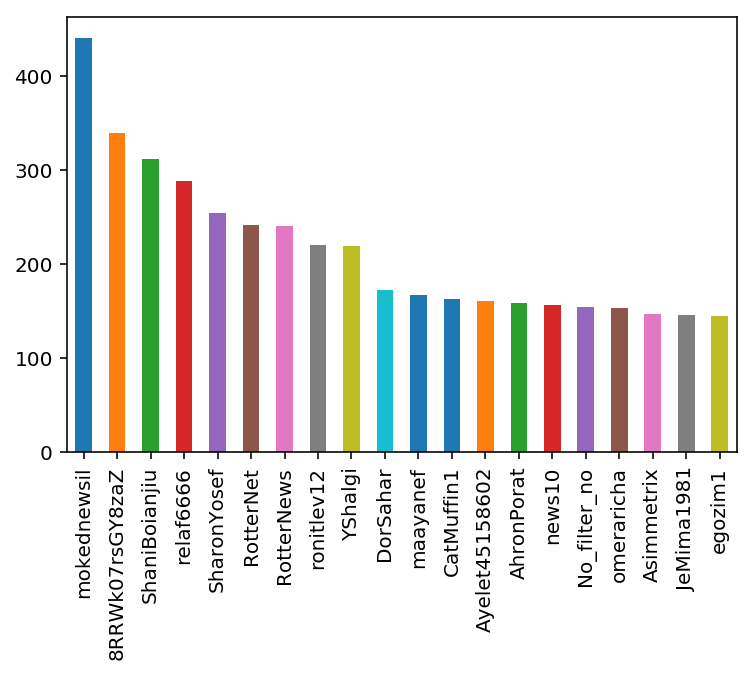

In [8]:
data27['user_screen_name'].value_counts().nlargest(20).plot.bar()
print("top tweeters on: '27/12/18'")

Let's look at a random selection of tweets from the most prolific people on twitter in Israel! 

mokednewsil: 
- "עונש מאסר לצעיר שהתגייס לדאע”ש https://t.co/BqNwinsUid"
- "קבר אביו של היועמ”ש הושחת: “מעשה מזעזע שיש לגנותו” https://t.co/beUKsacUik"
- "בפשיטה על בית בטורעאן נמצאו פגר דורבן, כלבי ציד וזעמן שחור https://t.co/v3HPyUQy69"

ShaniBoianjiu:

- "נכון אני בהלם שברקו וחזן באותה מפלגה למה היא לא מטפלת בזה? ובשחיתות? שחיתות היא טרור כלכלי על משלם המיסים ממעמד הביניים ומטה לכל דבר ועניין"
- "נכון זו עבירה על החוק הנציבות מים בגליל עוברת אצל כל מי ששם חביות נירוסטה בגשם ונותנת קנסות על זה שימו לב"

news10:

- "משרד החוץ הטורקי גינה בחריפות את אישור הבנייה של 2,200 יחידות חדשות באזור יהודה ושומרון @yosefyisrael25"
- "נתניהו על גנץ: לא מתערב איך השמאל מחלק את הקולות שלו • @BarakRavid עם הידיעה המלאה &gt;&gt; https://t.co/u8RRZPWm6n"
- "בן 30 ממזרח ירושלים נעצר הלילה בחשד להחזקת מעל 1,800 כדורי סם מסוג אקסטזי בשווי עשרות אלפי שקלים. הכדורים נמצאו במהלך חיפוש ברכבו של החשוד, לאחר שעורר את חשדם של השוטרים @Yossi_eli"

# MOST ACTIVE TIME OF DAY


Here we want to get some intution about the volume of activity during the day of the 27 of December 2018; and to learn if any one sudden event at a particular time of day could have caused the increased activity.

ran on: 71862 entries out of: 71862


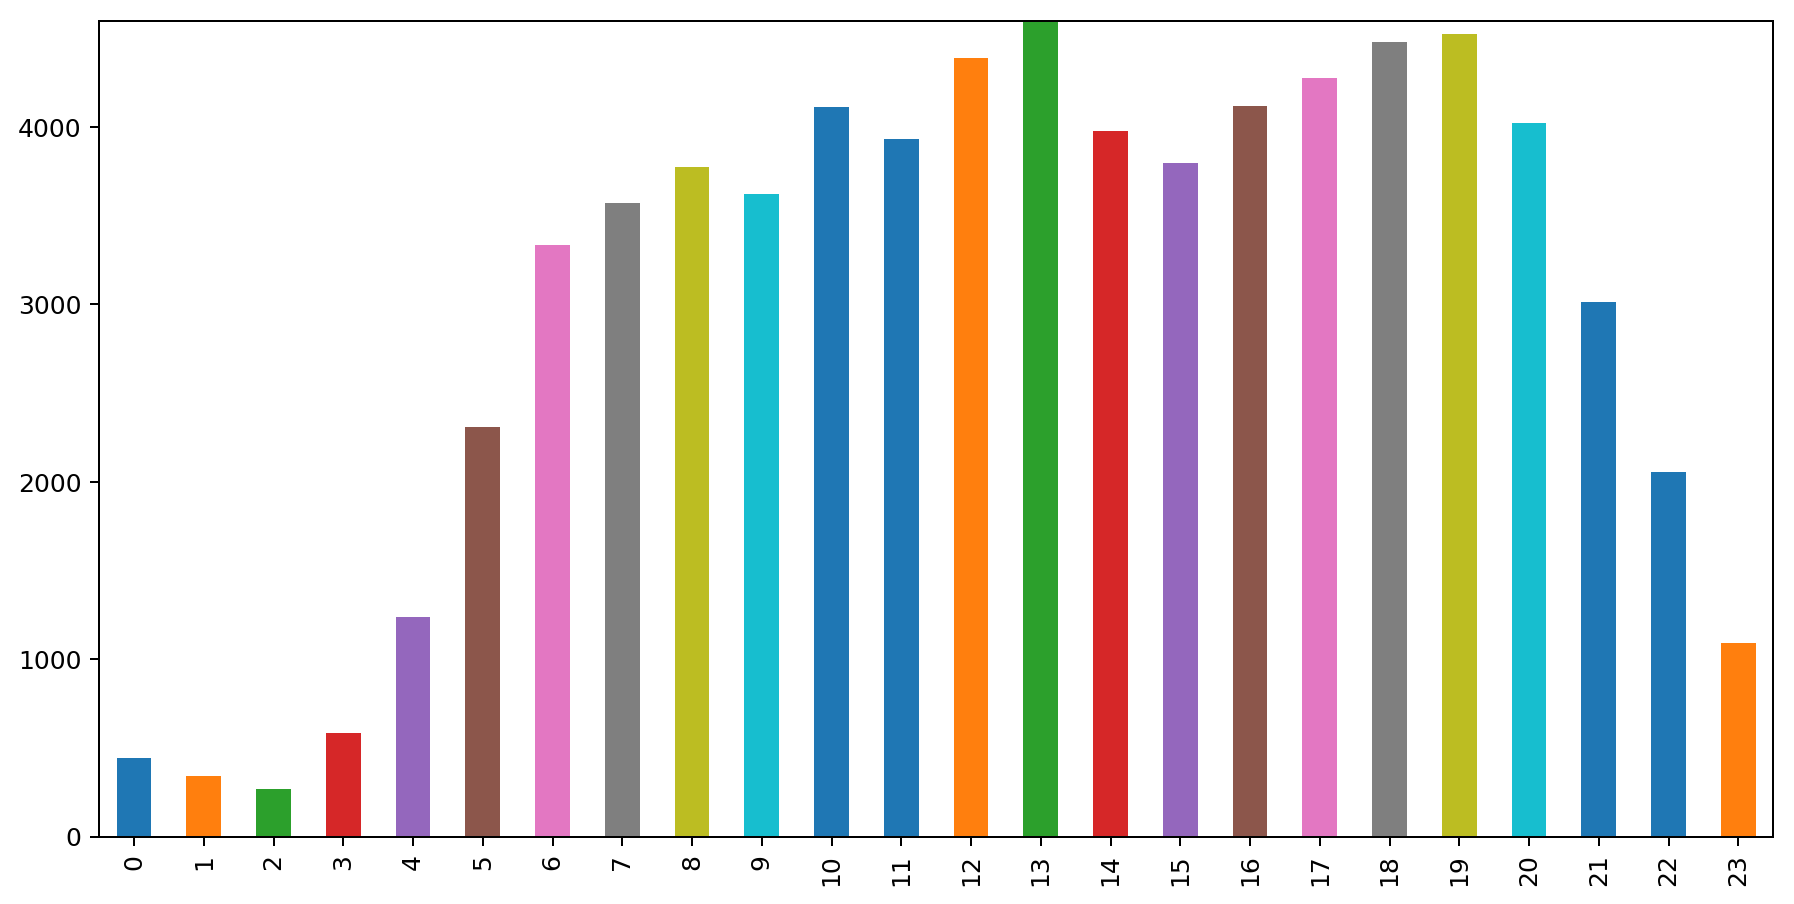

In [9]:
from dateutil import parser
from collections import defaultdict
from pprint import pprint
import time

d = defaultdict(list)
inputDATA = data27

# RUNS FOR WHOLE LENGTH OF data27
for i in range (len(inputDATA['text'])-1):
    dateTimeOfTweet = inputDATA[['created_at']].iloc[i]
    dateTimeOfTweet.to_string
    cellText =  dateTimeOfTweet[0]
    parser.parse(cellText)
    stringDT = parser.parse(cellText)
    timeOnly = stringDT.time()
    timeString = str(timeOnly)
    firstTwoDigits = timeString[:2]
    intTwodigits = int(firstTwoDigits)    
    keyTime = str(intTwodigits)
    d[keyTime].append(inputDATA[['user_screen_name']].iloc[i])
        
print("ran on: " + str(len(inputDATA['text'])) + " entries out of: " + str(inputDATA.shape[0]))
freqFortimeOfDay = []
listOfTimes =[]
for i in range(24):
    keyFinder = str(i)
    freqFortimeOfDay.append(len(d[keyFinder]))
    listOfTimes.append(i)

x2 = freqFortimeOfDay
y2 = listOfTimes
plt.figure(figsize=(12, 6), dpi= 90, facecolor='w', edgecolor='k')
s2 = pd.Series(x2, index = listOfTimes)
# labels =[1,2,3,4]
ticks = 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
plt.xticks(ticks)
plt.margins(0)
s2.plot.bar()

The frequency of tweeting throught the day seems logical and unremarkable. Low activity between midnight and early morning with steady activity throught the day; and with peaks at lunchtime (13:00) and after work/school (19:00).

In [10]:
# RUN THIS TO GET IMPORTS, FUNCTIONS AND ENV SETUP FOR POS AND TOKENIZATION
%run -i "hebconstparser/parse.py"

loading data-driven lexicon
skipping line: 30797.9999999 :: 

done loading


<Figure size 432x288 with 0 Axes>

Squeeze Dataset by factor of 14 (from 70k to 5k) to speed up process of finding nouns

In [11]:
n = 14
    
filename = "/Users/galmoore/anaconda/envs/twitterNLP2/data/twitter_dump_2018-12-27.csv"
num_lines = sum(1 for l in open(filename))
skip_idx = [x for x in range(1, num_lines) if x % n != 0]
dataSqueezed = pd.read_csv(filename,skiprows=skip_idx)

# EXTRACT TOPICS / NOUNS

In [ ]:
count = 0
caseOne = 'NN ' 
caseTwo = 'NNT '
caseThree = 'NNP '

nounsDF = pd.DataFrame(columns = ["nouns"])

for i in range(len(dataSqueezed['text'])-1):
    s = dataSqueezed[['text']].iloc[i]
    s.to_string
    cellText =  s[0]
    cellTextNoPunc = cellText.translate(None, string.punctuation)
    cellTextNoPunc = ' '.join(cellTextNoPunc.split())
    cellTextNoPunc = cellTextNoPunc.decode("utf8")

    try:
      tokenizedTweet = parse_sent(cellTextNoPunc,tokenized=tokenized)
      count += 1

      for i, c in enumerate(tokenizedTweet):
        if tokenizedTweet[i:i + len(caseOne)] == caseOne:
          fromNtoEnd = tokenizedTweet[i+3:]
          new = fromNtoEnd.split(")")
          nounsDF = nounsDF.append({
              "nouns":new[0]
          },ignore_index=True)

        if (tokenizedTweet[i:i + len(caseTwo)] == caseTwo or tokenizedTweet[i:i + len(caseThree)] == caseThree):
            fromNtoEnd = tokenizedTweet[i+4:]
            new = fromNtoEnd.split(")")
            foundNoun = new[0]
            nounsDF = nounsDF.append({
              "nouns":new[0]
          },ignore_index=True)

    except IndexError as e:
        pass

# FIND MOST POPULAR TOPICS / NOUNS

* If after running the rest of the notebook, the following line does not run automatically  because of a fault in the following cell,please shift + enter it. Should work fine despite error in previous cell. 

In [14]:
nounsDF['nouns'].value_counts().head(30)

ישראל     190
נתניהו    110
ראש        98
בית        91
ממשלה      84
ליכוד      81
״          78
שמאל       77
יום        73
מדינה      67
ביבי       65
אנשים      63
זמן        62
בחירות     62
גנץ        62
בני        58
דבר        58
אדם        58
מפלגה      55
חוק        52
כנסת       49
ימין       48
כלום       43
שנה        42
רגע        42
הכל        42
משהו       41
חיים       40
שנים       39
חוסן       38
Name: nouns, dtype: int64

The output of our new nouns dataframe seems unremarkable to someone familiar with Israeli media ettiquete. The most used nouns across more than 5,000 tweets are:
- Israel
- Netanyahu
- Prime minister
- LIKUD party

It is interesting to note that just by this list one could concur that Israeli twitter users (maybe even the public) are heavily interested in discussing, debating and expressing there opinions about politics. The 11th, 12th and 13th most frequent terms are people, time and elections. 

It is however notable that this date (27,12,18) is still carrying some of the turmoil created by the announcement on the 24th of December the 'Israeli government is calling an early elections in April'. This was the 6th most active day according to our analysis in the first part of this exercise.

The 13th highest places on our list seem logical and will suited for the context established here. However, places 14 and 15 are a surprise: the appearance of the words 'Benny' & 'Ganz'. At 2nd glance it is also apparent that the word "שמאל" (left wing) appears at 7th place on our list which might too be a hint...

# RESULTS SEEM INCONCLUSIVE. WHAT DO WE KNOW ABOUT BENNY GANZ THAT COULD TRIGGER SUCH INTEREST? WHAT IS THE BIGGEST NEWS STORY ABOUT HIM IN RECENT YEARS? THE ANSWER IS BELOW :-)

https://en.globes.co.il/en/article-former-idf-chief-benny-gantz-forms-new-party-1001266763
